# Military Aircraft Classification

You can find the dataset at the following url: https://zenodo.org/record/3464319#.YUiSrrgzaUk 
In general, MTARSI images are remote sensing images acquired from satellite images available on the Internet. 

In [30]:
# !pip install tensorflow

In [1]:
#import packages
import os
import numpy as np
import glob
import shutil

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import tensorflow as tf
import tensorflow.keras as keras 
import tensorflow.keras.layers as layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # building new model
from tensorflow.keras.layers import Dense # building new model
from tensorflow.keras.applications.vgg16 import VGG16  # Project used the Transfer Learning model
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Tensorflow version
tf.__version__

'2.13.0'

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
# First we will define train and test image paths...
train_files_path = "../../data/airplanedataset/Train/"
test_files_path = "../../data/airplanedataset/Test/"

# Let's load any airplane image from our dataset..
img = load_img(test_files_path + "B-52/3-1.jpg")

In [6]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


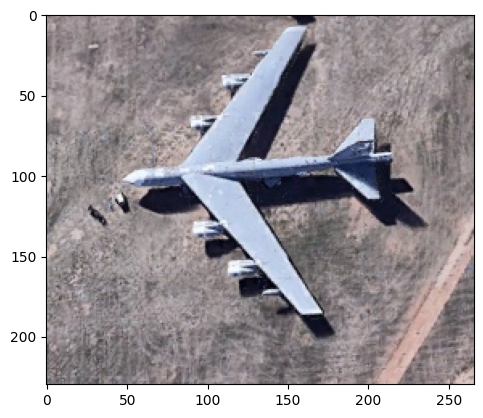

In [7]:
# Let's see this airplane
plt.imshow(img)
plt.show()

### Test and Train datasets

In [8]:
# build train and test datasets
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [9]:
numberOfAirplaneTypes = 5  # If you have added other planes types (with airplane images in directories of course)
                           # then you must change this number...

## Building the Model 

In [10]:
# VGG16 pre-trained complex deep learning model
vgg = VGG16()

In [11]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.src.engine.input_layer.InputLayer object at 0x7f2a00196c40>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f2a00045d60>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f8196550>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f29f8196700>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f8157b20>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f8157ca0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f29f8119b50>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f8126ac0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f812c100>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f8126700>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f29f812cdc0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f80bd8e0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f29f80bdd30>, <keras.src.layers.convolutional.co

In [12]:
# vggmodel_layersize_tobe_used = len(vgg_layers) - 1 (minus 1 means I omit the last layer - the output layer)
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i]) 

In [13]:
# used VGG model
for layers in model.layers:
    layers.trainable = False
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))
#print model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
# Compile Model
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
#batch size
batch_size = 32

In [17]:
epochs = 10
with tf.device('GPU'):
    history = model.fit(train_data, steps_per_epoch=1600//batch_size, epochs=c, validation_data=test_data, validation_steps= 800//batch_size)

Epoch 1/10
50/50 [==============================] - 8s 135ms/step - loss: 0.1798 - accuracy: 0.9484 - val_loss: 0.1916 - val_accuracy: 0.9300
Epoch 2/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0586 - accuracy: 0.9805
Epoch 3/10
50/50 [==============================] - 6s 115ms/step - loss: 0.0445 - accuracy: 0.9817
Epoch 4/10
50/50 [==============================] - 6s 113ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 5/10
50/50 [==============================] - 6s 117ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 6/10
50/50 [==============================] - 6s 116ms/step - loss: 0.0121 - accuracy: 0.9975
Epoch 7/10
50/50 [==============================] - 6s 123ms/step - loss: 0.0052 - accuracy: 0.9994
Epoch 8/10
50/50 [==============================] - 6s 121ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 9/10
50/50 [==============================] - 7s 130ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 6s 11

In [45]:
# Check history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
# print average values
print("Average train loss: ", np.average(history.history['loss']))
print("Average train accuracy: ", np.average(history.history['accuracy']))
print("Average train val_loss: ", np.average(history.history['val_loss']))
print("Average train val_accuracy: ", np.average(history.history['val_accuracy']))
print("Epoch: ", history.epoch) 

Average train loss:  0.03425639165798202
Average train accuracy:  0.9894874036312103
Average train val_loss:  0.19163817167282104
Average train val_accuracy:  0.9300000071525574
Epoch:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


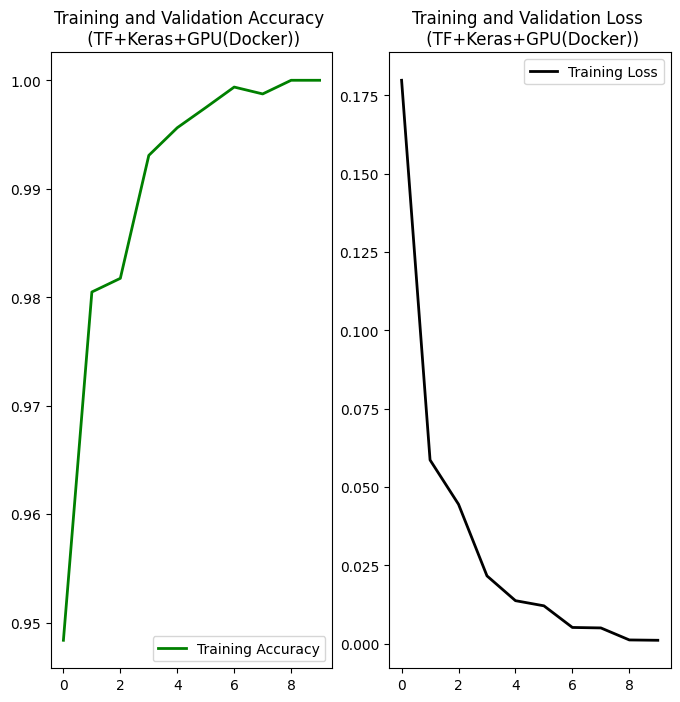

In [59]:
# Plot Training and Validation Graphs one gpu.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2, color="green")
# plt.plot(range(1, 11), val_acc, label='Validation Accuracy', linewidth=2, color="black")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy \n (TF+Keras+GPU(Docker))')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2, color="black")
# plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth=2, color="black")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss \n (TF+Keras+GPU(Docker))')
plt.show()

In [44]:
#save model
model.save('../../model/military_aircraft_cs_tf_gpu.keras')

## Testing model

In [33]:
# load a aircraft image --> rescale 
img = Image.open("thunder.jpeg").resize((224,224))

In [34]:
# convert to array
img = np.array(img)

In [35]:
# Shape
img.shape

(224, 224, 3)

In [36]:
print(img.ndim)

3


In [37]:
# model require 4 dim, so use reshape(-1,..)
img = img.reshape(-1,224,224,3)   

In [38]:
# look image shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [39]:
# scale input pixels between -1 and 1
img = preprocess_input(img)   

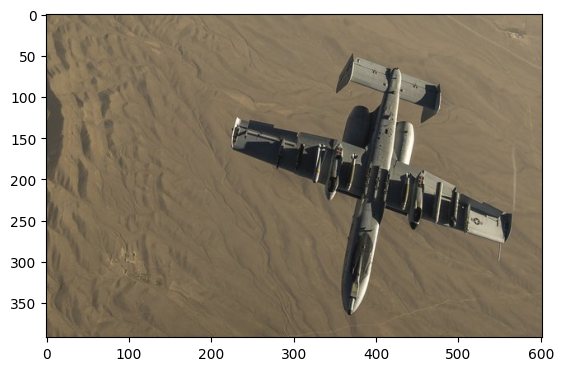

In [40]:
# see the aircraft..
img_for_display = load_img("thunder.jpeg")
plt.imshow(img_for_display)
plt.show()

## Model Prediction

In [41]:
preds = model.predict(img) 


1/1 [==============================] - 0s 14ms/step


In [42]:
# see prediction
preds

array([[7.2413999e-01, 5.1862681e-10, 3.2187911e-06, 2.7585673e-01,
        8.3294225e-08]], dtype=float32)

In [43]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result]) 

A-10 Thunderbolt
